In [2]:
"""
Analyse des variables catégorielles : tags, origines ethniques, restrictions alimentaires
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

In [3]:
def load_data():
    """Charge les données"""
    df = pd.read_csv("../data/RAW_recipes.csv")
    return df

In [4]:
def analyze_tags(df):
    """Analyse des tags (catégories de recettes)"""
    
    print("\n" + "="*60)
    print("ANALYSE DES TAGS")
    print("="*60)
    
    # Extraire tous les tags
    all_tags = []
    for tags_str in df['tags']:
        try:
            tags = ast.literal_eval(tags_str)
            all_tags.extend(tags)
        except:
            continue
    
    # Compter les fréquences
    tag_counts = Counter(all_tags)
    
    print(f"\n Statistiques générales:")
    print(f"  Nombre de tags uniques: {len(tag_counts):,}")
    print(f"  Tags par recette (moyenne): {len(all_tags)/len(df):.1f}")
    
    # Top 20 tags
    top_tags = tag_counts.most_common(20)
    print(f"\n Top 20 tags les plus fréquents:")
    for i, (tag, count) in enumerate(top_tags, 1):
        pct = count / len(df) * 100
        print(f"  {i:2d}. {tag:25s} : {count:6,} recettes ({pct:5.1f}%)")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart des top 20
    tags_df = pd.DataFrame(top_tags, columns=['tag', 'count'])
    axes[0].barh(tags_df['tag'], tags_df['count'], color='steelblue', edgecolor='black')
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Nombre de recettes', fontsize=12)
    axes[0].set_title('Top 20 des tags les plus fréquents', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Distribution du nombre de tags par recette
    tags_per_recipe = df['tags'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) else 0)
    axes[1].hist(tags_per_recipe, bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[1].axvline(tags_per_recipe.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne = {tags_per_recipe.mean():.1f}')
    axes[1].axvline(tags_per_recipe.median(), color='green', linestyle='--', linewidth=2, label=f'Médiane = {tags_per_recipe.median():.0f}')
    axes[1].set_xlabel('Nombre de tags par recette', fontsize=12)
    axes[1].set_ylabel('Fréquence', fontsize=12)
    axes[1].set_title('Distribution du nombre de tags par recette', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()

    plt.show()
    
    return tag_counts



In [5]:
def analyze_ethnicity(df):
    """Analyse des origines ethniques"""
    
    print("\n" + "="*60)
    print("ANALYSE DES ORIGINES ETHNIQUES")
    print("="*60)
    
    ethnicity_list = [
        'italian', 'mexican', 'asian', 'american', 'french', 'chinese',
        'indian', 'greek', 'spanish', 'thai', 'japanese', 'german',
        'middle-eastern', 'caribbean', 'african', 'korean', 'vietnamese',
        'brazilian', 'moroccan', 'turkish'
    ]
    
    # Compter les recettes par origine
    ethnicity_counts = {}
    for ethnicity in ethnicity_list:
        count = df['tags'].apply(lambda x: ethnicity in str(x).lower()).sum()
        if count > 0:
            ethnicity_counts[ethnicity] = count
    
    # Trier par fréquence
    ethnicity_sorted = sorted(ethnicity_counts.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n Nombre d'origines ethniques détectées: {len(ethnicity_counts)}")
    print(f"\n Top 15 origines culinaires:")
    for i, (ethnicity, count) in enumerate(ethnicity_sorted[:15], 1):
        pct = count / len(df) * 100
        print(f"  {i:2d}. {ethnicity.capitalize():20s} : {count:6,} recettes ({pct:5.1f}%)")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(12, 8))
    
    top_15 = ethnicity_sorted[:15]
    ethnicities = [e[0].capitalize() for e in top_15]
    counts = [e[1] for e in top_15]
    
    colors = plt.cm.Set3(np.linspace(0, 1, 15))
    ax.barh(ethnicities, counts, color=colors, edgecolor='black')
    ax.invert_yaxis()
    ax.set_xlabel('Nombre de recettes', fontsize=12)
    ax.set_title('Distribution des origines culinaires (Top 15)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Annoter les barres
    for i, (ethnicity, count) in enumerate(top_15):
        ax.text(count + 500, i, f'{count:,}', va='center', fontsize=10)
    
    plt.tight_layout()

    plt.show()



In [6]:
def analyze_dietary(df):
    """Analyse des restrictions alimentaires"""
    
    print("\n" + "="*60)
    print("ANALYSE DES RESTRICTIONS ALIMENTAIRES")
    print("="*60)
    
    dietary_list = [
        'vegetarian', 'vegan', 'gluten-free', 'dairy-free', 'low-carb',
        'low-fat', 'low-sodium', 'low-calorie', 'keto', 'paleo',
        'nut-free', 'egg-free', 'soy-free', 'pescatarian', 'kosher', 'halal'
    ]
    
    # Compter les recettes par restriction
    dietary_counts = {}
    for diet in dietary_list:
        count = df['tags'].apply(lambda x: diet in str(x).lower()).sum()
        if count > 0:
            dietary_counts[diet] = count
    
    # Trier par fréquence
    dietary_sorted = sorted(dietary_counts.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n Nombre de restrictions détectées: {len(dietary_counts)}")
    print(f"\n Restrictions alimentaires:")
    for i, (diet, count) in enumerate(dietary_sorted, 1):
        pct = count / len(df) * 100
        print(f"  {i:2d}. {diet.capitalize():20s} : {count:6,} recettes ({pct:5.1f}%)")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 6))
    
    diets = [d[0].capitalize() for d in dietary_sorted]
    counts = [d[1] for d in dietary_sorted]
    
    colors = ['green' if c > 10000 else 'orange' if c > 5000 else 'red' for c in counts]
    ax.bar(diets, counts, color=colors, edgecolor='black', alpha=0.7)
    ax.set_ylabel('Nombre de recettes', fontsize=12)
    ax.set_title('Distribution des restrictions alimentaires', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
 
    plt.show()



In [7]:
def analyze_ingredients(df):
    """Analyse des ingrédients les plus fréquents"""
    
    print("\n" + "="*60)
    print("ANALYSE DES INGRÉDIENTS")
    print("="*60)
    
    # Extraire tous les ingrédients
    all_ingredients = []
    for ing_str in df['ingredients']:
        try:
            ingredients = ast.literal_eval(ing_str)
            all_ingredients.extend(ingredients)
        except:
            continue
    
    # Compter les fréquences
    ingredient_counts = Counter(all_ingredients)
    
    print(f"\n Statistiques générales:")
    print(f"  Ingrédients uniques: {len(ingredient_counts):,}")
    print(f"  Ingrédients par recette (moyenne): {df['n_ingredients'].mean():.1f}")
    
    # Top 30 ingrédients
    top_ingredients = ingredient_counts.most_common(30)
    print(f"\n Top 30 ingrédients les plus utilisés:")
    for i, (ing, count) in enumerate(top_ingredients, 1):
        pct = count / len(df) * 100
        print(f"  {i:2d}. {ing:30s} : {count:6,} recettes ({pct:5.1f}%)")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ings_df = pd.DataFrame(top_ingredients, columns=['ingredient', 'count'])
    ax.barh(ings_df['ingredient'], ings_df['count'], color='forestgreen', edgecolor='black', alpha=0.7)
    ax.invert_yaxis()
    ax.set_xlabel('Nombre de recettes', fontsize=12)
    ax.set_title('Top 30 des ingrédients les plus fréquents', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()

    plt.show()
    
    return ingredient_counts



 Chargement des données...
 231,637 recettes chargées


ANALYSE DES TAGS

 Statistiques générales:
  Nombre de tags uniques: 552
  Tags par recette (moyenne): 17.9

 Top 20 tags les plus fréquents:
   1. preparation               : 230,546 recettes ( 99.5%)
   2. time-to-make              : 225,326 recettes ( 97.3%)
   3. course                    : 218,148 recettes ( 94.2%)
   4. main-ingredient           : 170,446 recettes ( 73.6%)
   5. dietary                   : 165,091 recettes ( 71.3%)
   6. easy                      : 126,062 recettes ( 54.4%)
   7. occasion                  : 114,145 recettes ( 49.3%)
   8. cuisine                   : 91,165 recettes ( 39.4%)
   9. low-in-something          : 85,776 recettes ( 37.0%)
  10. main-dish                 : 71,786 recettes ( 31.0%)
  11. equipment                 : 70,436 recettes ( 30.4%)
  12. 60-minutes-or-less        : 69,990 recettes ( 30.2%)
  13. number-of-servings        : 58,949 recettes ( 25.4%)
  14. meat                  

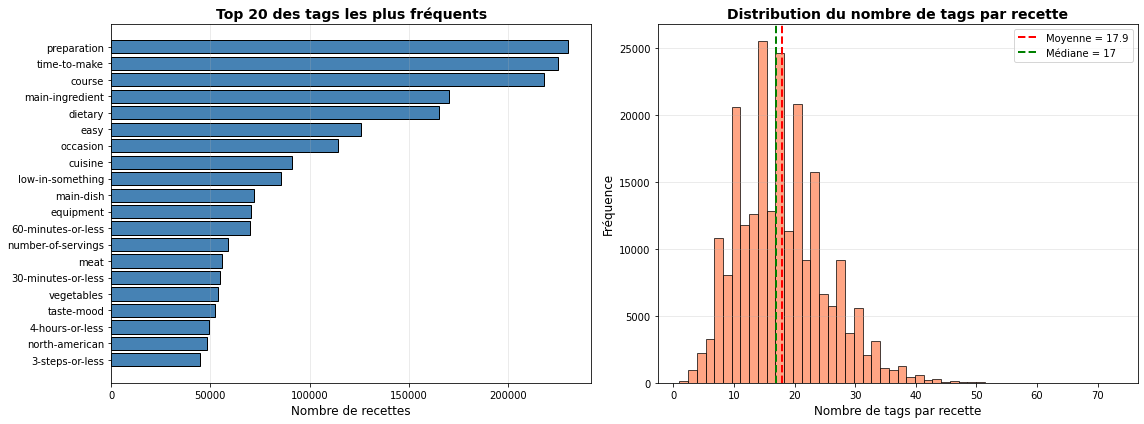


ANALYSE DES ORIGINES ETHNIQUES

 Nombre d'origines ethniques détectées: 20

 Top 15 origines culinaires:
   1. American             : 49,532 recettes ( 21.4%)
   2. Asian                : 13,485 recettes (  5.8%)
   3. Italian              :  7,410 recettes (  3.2%)
   4. Mexican              :  6,694 recettes (  2.9%)
   5. African              :  2,851 recettes (  1.2%)
   6. Indian               :  2,708 recettes (  1.2%)
   7. Greek                :  2,391 recettes (  1.0%)
   8. French               :  2,268 recettes (  1.0%)
   9. Middle-eastern       :  2,067 recettes (  0.9%)
  10. Chinese              :  2,015 recettes (  0.9%)
  11. Caribbean            :  1,709 recettes (  0.7%)
  12. German               :  1,377 recettes (  0.6%)
  13. Thai                 :  1,208 recettes (  0.5%)
  14. Spanish              :  1,072 recettes (  0.5%)
  15. Moroccan             :    897 recettes (  0.4%)


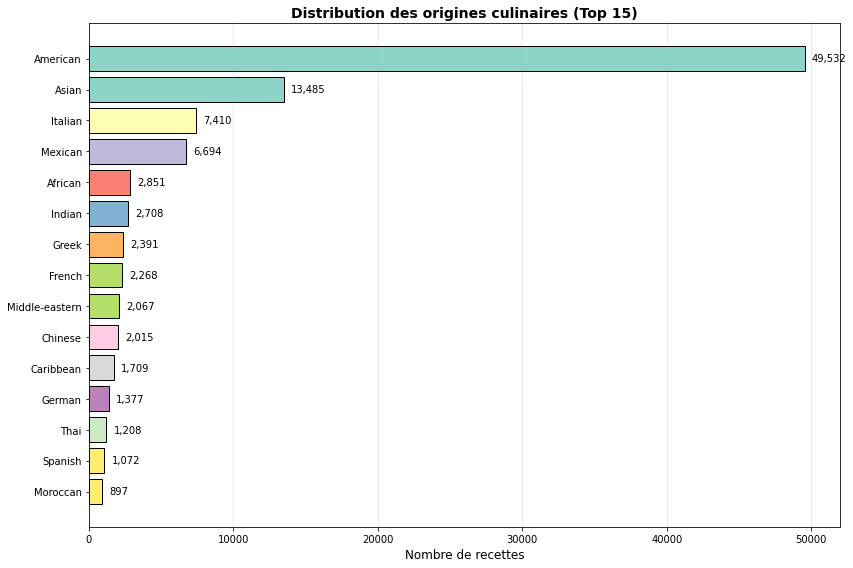


ANALYSE DES RESTRICTIONS ALIMENTAIRES

 Nombre de restrictions détectées: 11

 Restrictions alimentaires:
   1. Low-sodium           : 43,349 recettes ( 18.7%)
   2. Low-carb             : 42,189 recettes ( 18.2%)
   3. Low-calorie          : 36,429 recettes ( 15.7%)
   4. Vegetarian           : 35,651 recettes ( 15.4%)
   5. Low-fat              : 22,170 recettes (  9.6%)
   6. Vegan                : 10,012 recettes (  4.3%)
   7. Gluten-free          :  5,743 recettes (  2.5%)
   8. Egg-free             :  5,064 recettes (  2.2%)
   9. Kosher               :  4,446 recettes (  1.9%)
  10. Nut-free             :    218 recettes (  0.1%)
  11. Dairy-free           :    195 recettes (  0.1%)


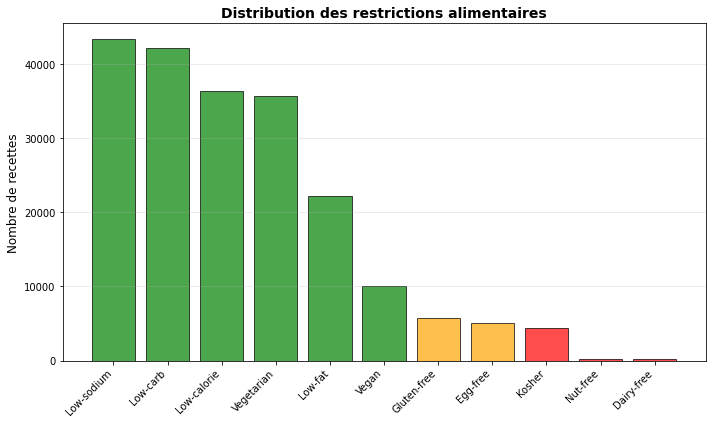


ANALYSE DES INGRÉDIENTS

 Statistiques générales:
  Ingrédients uniques: 14,942
  Ingrédients par recette (moyenne): 9.1

 Top 30 ingrédients les plus utilisés:
   1. salt                           : 85,746 recettes ( 37.0%)
   2. butter                         : 54,975 recettes ( 23.7%)
   3. sugar                          : 44,535 recettes ( 19.2%)
   4. onion                          : 39,065 recettes ( 16.9%)
   5. water                          : 34,914 recettes ( 15.1%)
   6. eggs                           : 33,761 recettes ( 14.6%)
   7. olive oil                      : 32,822 recettes ( 14.2%)
   8. flour                          : 26,266 recettes ( 11.3%)
   9. milk                           : 25,786 recettes ( 11.1%)
  10. garlic cloves                  : 25,748 recettes ( 11.1%)
  11. pepper                         : 22,319 recettes (  9.6%)
  12. brown sugar                    : 18,655 recettes (  8.1%)
  13. garlic                         : 18,087 recettes (  7.8%)
  14. 

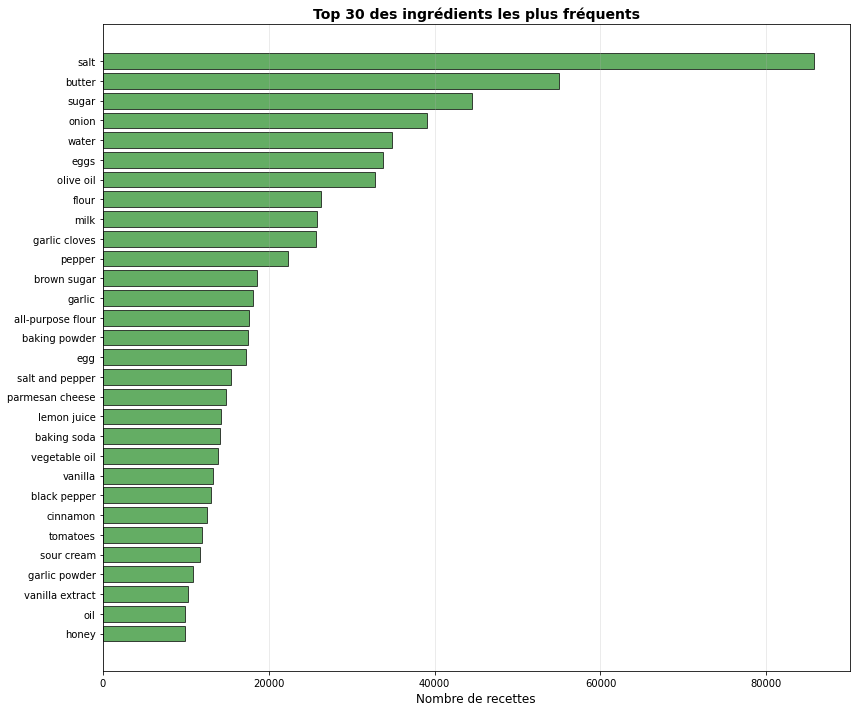

In [8]:
def main():
    """Fonction principale"""
    
    print(" Chargement des données...")
    df = load_data()
    print(f" {len(df):,} recettes chargées\n")
    
    # Analyses
    tag_counts = analyze_tags(df)
    analyze_ethnicity(df)
    analyze_dietary(df)
    ingredient_counts = analyze_ingredients(df)
    
 
    


if __name__ == "__main__":
    main()